In [4]:
data = read.csv('Cung cap buoi 6/chol.txt', sep='')
head(data)

,AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,20,176,77,195,nonsmo,b,alive
2,53,167,56,250,sigare,o,dead
3,44,170,80,304,sigare,a,dead
4,37,173,89,178,nonsmo,o,alive
5,26,170,71,206,sigare,o,alive
6,41,165,62,284,sigare,o,alive


In [5]:
summary(data)

      AGE            HEIGHT          WEIGHT            CHOL      
 Min.   :18.00   Min.   :156.0   Min.   : 53.00   Min.   :107.0  
 1st Qu.:28.75   1st Qu.:168.0   1st Qu.: 68.75   1st Qu.:204.0  
 Median :37.00   Median :172.0   Median : 75.00   Median :232.0  
 Mean   :35.72   Mean   :172.3   Mean   : 75.89   Mean   :233.6  
 3rd Qu.:42.00   3rd Qu.:176.0   3rd Qu.: 82.00   3rd Qu.:259.0  
 Max.   :58.00   Max.   :191.0   Max.   :110.00   Max.   :455.0  
    SMOKE              BLOOD               MORT          
 Length:200         Length:200         Length:200        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         

In [6]:
print(str(data))

'data.frame':	200 obs. of  7 variables:
 $ AGE   : int  20 53 44 37 26 41 39 28 33 39 ...
 $ HEIGHT: int  176 167 170 173 170 165 174 171 180 166 ...
 $ WEIGHT: int  77 56 80 89 71 62 75 68 100 74 ...
 $ CHOL  : int  195 250 304 178 206 284 232 152 209 150 ...
 $ SMOKE : chr  "nonsmo" "sigare" "sigare" "nonsmo" ...
 $ BLOOD : chr  "b" "o" "a" "o" ...
 $ MORT  : chr  "alive" "dead" "dead" "alive" ...
NULL


In [55]:
library('ggplot2')
library('gridExtra')
library('ggExtra')
library('tidyverse')

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.1     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::combine() masks gridExtra::combine()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()



In [58]:
group_blood = data %>% group_by(BLOOD)
summary = summarize(group_blood, 
                   count=n()
                   )
summary

`summarise()` ungrouping output (override with `.groups` argument)



BLOOD,count
<chr>,<int>
a,82
ab,5
b,22
o,91


In [16]:
p = ggplot(data,aes(AGE))

In [17]:
p1 = p +
geom_histogram(bins=10, color='orange',fill='darkgreen') + 
ggtitle('Distribution of AGE') + 
theme_bw(base_size=12)


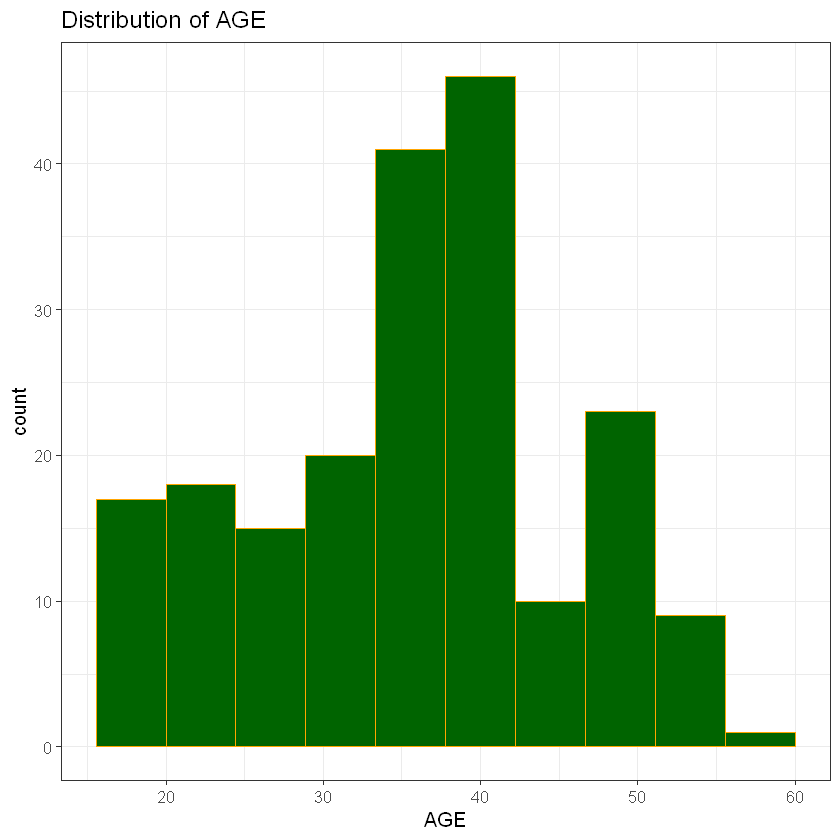

In [18]:
p1

In [41]:
scatter_p = ggplot(data = data, aes(x  = HEIGHT, y = WEIGHT, fill = AGE, color = AGE, lwd = 1))

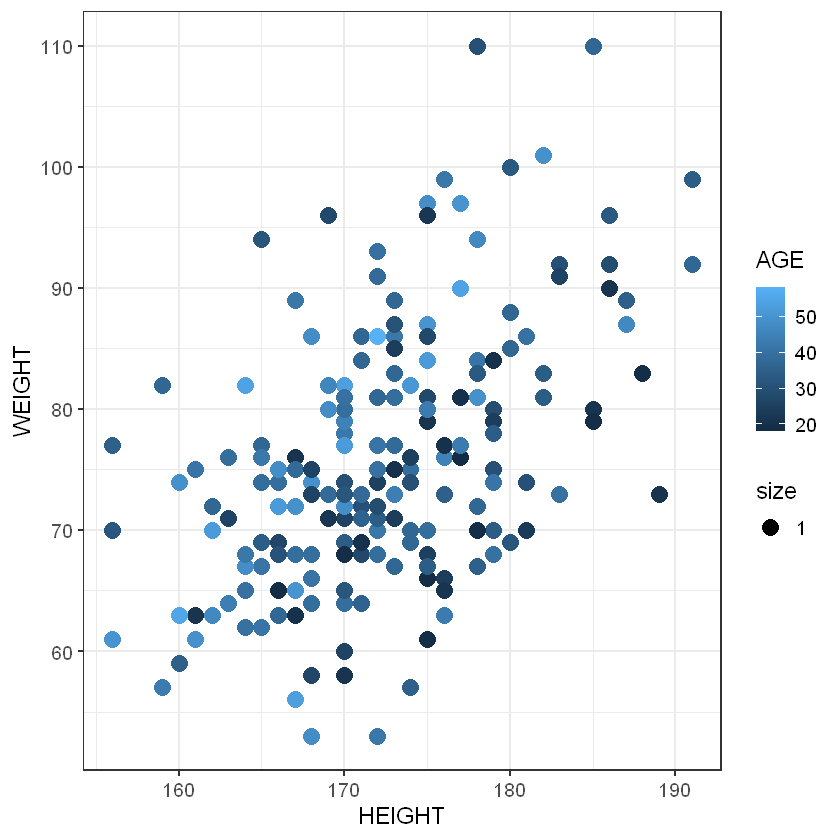

In [42]:
scatter_p1 = scatter_p + geom_point() +
theme_bw(base_size=14)
scatter_p1

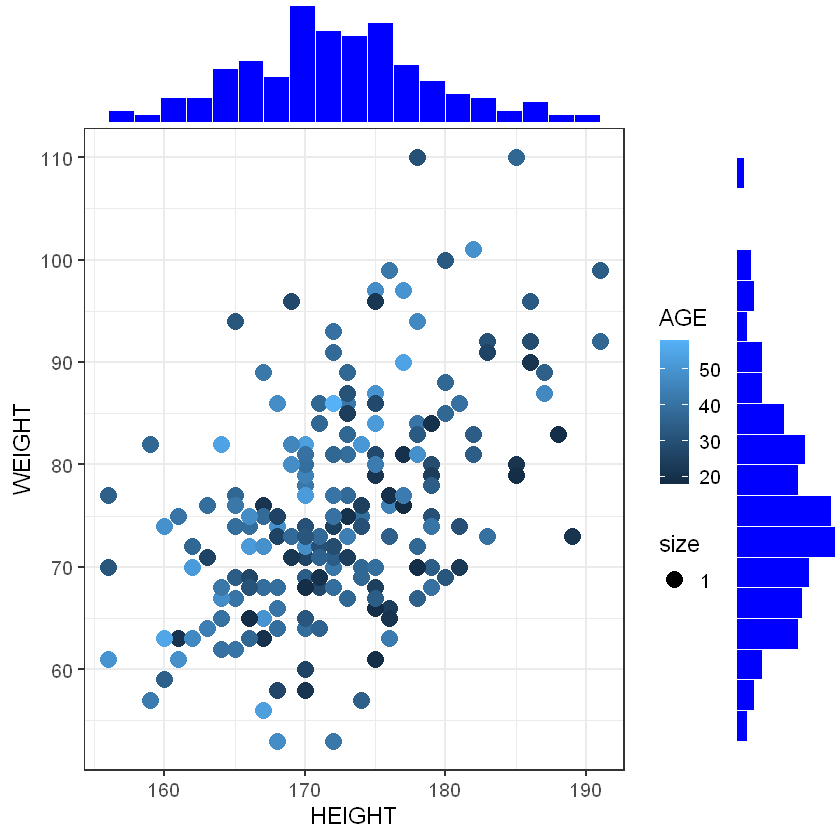

In [43]:
ggMarginal(scatter_p1, type='histogram', col='white',
          fill = 'blue',bins=20)

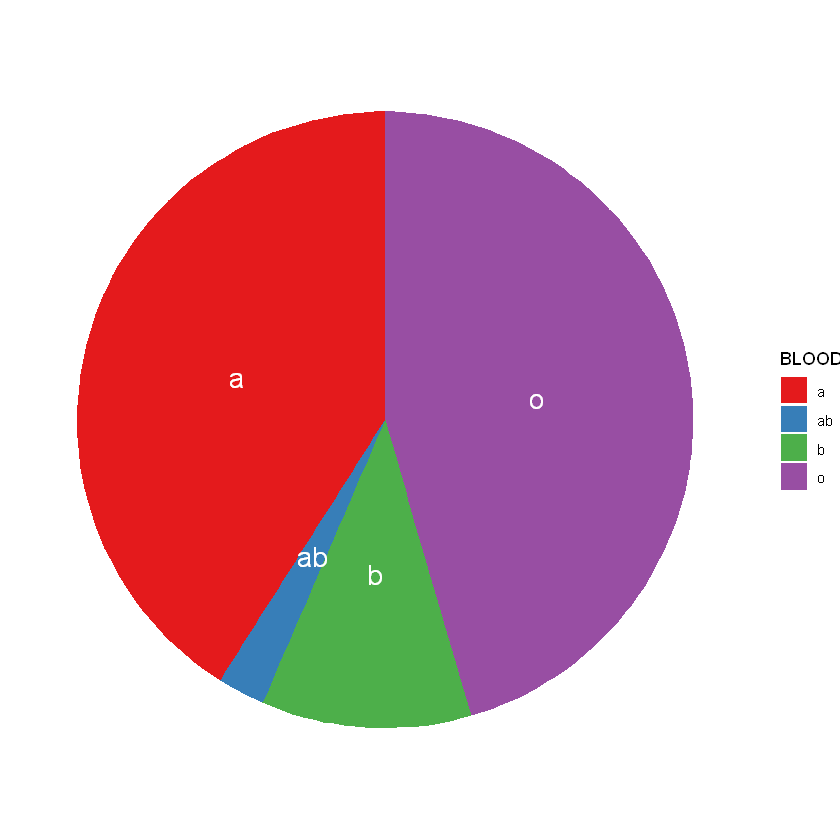

In [76]:
# Compute the position of labels
summary = summary %>% 
  arrange(desc(BLOOD)) %>%
  mutate(prop = count / sum(summary$count) *100) %>%
  mutate(ypos = cumsum(prop)- 0.5*prop )
 

# Basic piechart
ggplot(summary, aes(x="", y=prop, fill=BLOOD)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  theme_void() + 
  geom_text(aes(y = ypos, label = BLOOD), color = "white", size=6) +
  scale_fill_brewer(palette="Set1")
